# Movies Reviews Sentiment Analysis
### Data

In [4]:
%load_ext autoreload
%autoreload 2
# Cargamos el dataset
from util import load_datasets_unlabeled_test
train, dev, test = load_datasets_unlabeled_test(test_size_val=0.2) # en realidad dev_size_val
X_train, y_train = train
X_dev, y_dev = dev
X_test=test  # No tenemos el correspondiente y_test

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## TfidfVectorizer Approach

In [5]:
from sklearn.model_selection import ParameterGrid
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn import metrics
from util import eval
from util import iterate_pipeline_params    
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
from util import print_plot_classification_report
from util import  load_model,save_model


### LogisticRegressionCV

Train using <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>
Reporte de clasificación: 

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       419
          1       1.00      1.00      1.00       437

avg / total       1.00      1.00      1.00       856





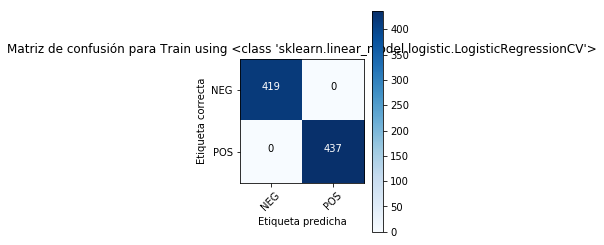

Dev using <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>
Reporte de clasificación: 

             precision    recall  f1-score   support

          0       0.90      0.90      0.90       116
          1       0.88      0.88      0.88        98

avg / total       0.89      0.89      0.89       214





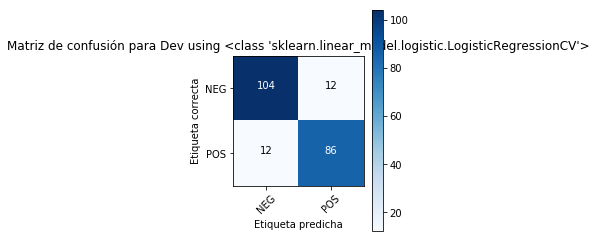

In [7]:
#
vect = TfidfVectorizer()
clf = LogisticRegressionCV()

pipeline = Pipeline([
    ('vect', vect),
    ('clf', clf),
])
#
pipeline.fit(X_train,y_train)
est=str(pipeline.steps[-1][1].__class__)
# Train
print_plot_classification_report(pipeline,X_train,y_train,'Train using ' + est,plotFlag=True,classes_list=['NEG','POS'])
# Dev
print_plot_classification_report(pipeline,X_dev,y_dev,'Dev using ' + est,plotFlag=True,classes_list=['NEG','POS'])

### LogisticRegressionCV - ParamsGrid

In [75]:
import numpy as np
param_grid = {
    'vect__binary': [False],
    'vect__ngram_range': [(1, 1)],
    'vect__min_df': [1],
    'vect__max_df':np.linspace(0.8,0.9,20) ,
    'vect__use_idf': [True],  
    'vect__sublinear_tf': [False], 
    'clf__random_state': [0],
    'clf__scoring':['accuracy'],
    'clf__n_jobs':[-1],
    'clf__Cs':[10],
    'clf__class_weight':['balanced'],
    'clf__max_iter':[1000],
    'clf__dual':[True],
    'clf__solver':['liblinear'],
    'clf__cv':[5],
    'clf__tol':[1e-6]
}
params_list = list(ParameterGrid(param_grid))
vect = TfidfVectorizer()
clf = LogisticRegressionCV()

pipeline = Pipeline([
    ('vect', vect),
    ('clf', clf),
])

In [76]:
results=iterate_pipeline_params(pipeline,params_list,X_train,y_train,X_dev, y_dev)

In [77]:
# results to Pandas
results_df = pd.DataFrame(results)
results_df.sort_values(['acc', 'f1'], ascending=False)[:5]

acc  clf__Cs clf__class_weight  clf__cv  clf__dual  clf__max_iter  \
0  0.865672       10          balanced        5       True           1000   
1  0.865672       10          balanced        5       True           1000   
2  0.865672       10          balanced        5       True           1000   
3  0.865672       10          balanced        5       True           1000   
4  0.865672       10          balanced        5       True           1000   

   clf__n_jobs  clf__random_state clf__scoring clf__solver  clf__tol  \
0           -1                  0     accuracy   liblinear  0.000001   
1           -1                  0     accuracy   liblinear  0.000001   
2           -1                  0     accuracy   liblinear  0.000001   
3           -1                  0     accuracy   liblinear  0.000001   
4           -1                  0     accuracy   liblinear  0.000001   

         f1  vect__binary  vect__max_df  vect__min_df vect__ngram_range  \
0  0.865063         False      0.800000             1            (1, 1)   
1  0.865063         False      0.805263             1            (1, 1)   
2  0.865063         False      0.810526             1            (1, 1)   
3  0.865063         False      0.815789             1            (1, 1)   
4  0.865063         False      0.821053             1            (1, 1)   

   vect__sublinear_tf  vect__use_idf  
0               False           True  
1               False           True  
2               False           True  
3               False           True  
4               False           True

Train using <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>
Reporte de clasificación: 

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       481
          1       1.00      1.00      1.00       482

avg / total       1.00      1.00      1.00       963





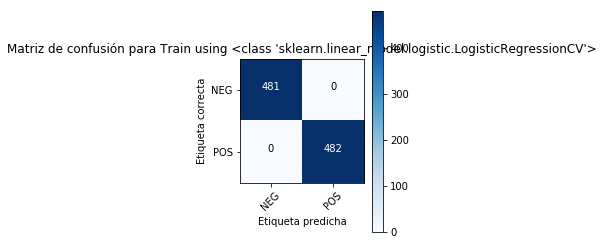

Dev using <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>
Reporte de clasificación: 

             precision    recall  f1-score   support

          0       0.84      0.89      0.86        54
          1       0.88      0.83      0.85        53

avg / total       0.86      0.86      0.86       107





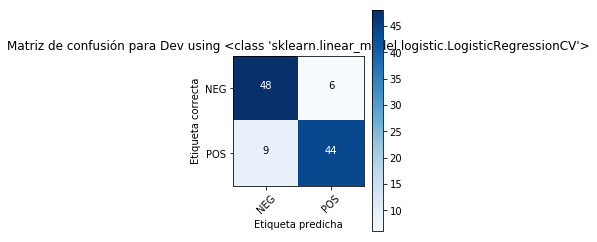

In [62]:
from util import print_plot_classification_report
from util import  load_model,save_model
save_flag=False
#
idx=17
vect = TfidfVectorizer()
clf = LogisticRegressionCV()
pipeline = Pipeline([
    ('vect', vect),
    ('clf', clf),
])
params_=dict(results_df.iloc[idx].drop(['acc','f1']))
pipeline.set_params(**params_)
pipeline.fit(X_train,y_train)
if save_flag:
    save_model(pipeline,'pipe_tv_logregcv_iteparams_first_test_lucky')
est=str(pipeline.steps[-1][1].__class__)
# Train
print_plot_classification_report(pipeline,X_train,y_train,'Train using ' + est,plotFlag=True,classes_list=['NEG','POS'])
# Dev
print_plot_classification_report(pipeline,X_dev,y_dev,'Dev using ' + est,plotFlag=True,classes_list=['NEG','POS'])